In [148]:
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
img = cv.imread ("1.jpg")

In [149]:
def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)

    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)
    
    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

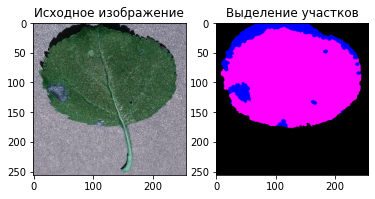

In [150]:
res_1 = CalcOfDamageAndNonDamage("1.jpg")

plt.subplot(121), plt.imshow(img)
plt.title('Исходное изображение')
plt.subplot(122), plt.imshow(res_1)
plt.title('Выделение участков')
plt.show()

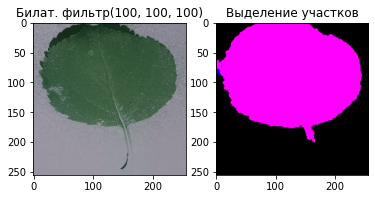

In [151]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(img, 100, 100, 100)
cv.imwrite("bl.png", bilateral)

res_2 = CalcOfDamageAndNonDamage("bl.png")

plt.subplot(121), plt.imshow(bilateral)
plt.title('Билат. фильтр(100, 100, 100)')
plt.subplot(122), plt.imshow(res_2)
plt.title('Выделение участков')
plt.show()

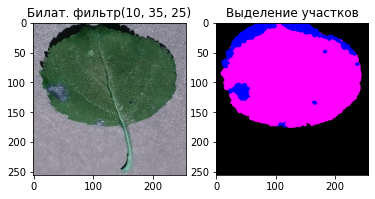

In [152]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imwrite("bl.png", bilateral)

res_3 = CalcOfDamageAndNonDamage("bl.png")

plt.subplot(121), plt.imshow(bilateral)
plt.title('Билат. фильтр(10, 35, 25)')
plt.subplot(122), plt.imshow(res_3)
plt.title('Выделение участков')
plt.show()

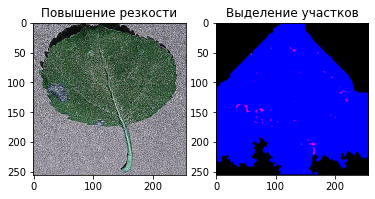

In [153]:
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
sharp_img = cv.filter2D(img, -1, kernel3)


cv.imwrite("sh.png", sharp_img)

res_4 = CalcOfDamageAndNonDamage("sh.png")

plt.subplot(121), plt.imshow(sharp_img)
plt.title('Повышение резкости')
plt.subplot(122), plt.imshow(res_4)
plt.title('Выделение участков')
plt.show()

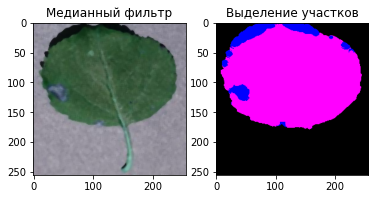

In [154]:
median = cv.medianBlur(img, ksize=5)

cv.imwrite("md.png", median)

res_5 = CalcOfDamageAndNonDamage("md.png")

plt.subplot(121), plt.imshow(median)
plt.title('Медианный фильтр')
plt.subplot(122), plt.imshow(res_5)
plt.title('Выделение участков')
plt.show()

Итог
    
Выделение поврежденных участков листа, в данном случае, лучше производить на исходном изображении. Наличие шума для данной операции не является проблемой. Если же сначала устранить шум, а затем произвести выделение поврежденных участков, то в результате будут отображены только сильные повреждения. Если увеличить шум, то результат будет неудовлетворительный.